In [4]:
#Importing packages
import pandas as pd
from datetime import datetime
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from math import pi

## Exercise 1
#### Maximum time under water
We want to compare the Maximum Time Under Water between 6 funds.

Maximum Time Under Water measures the longest time it takes for a portfolio (or asset) to recover from a loss and return to its previous highest value.

### Import files

In [48]:
data = pd.read_csv("funds.csv", index_col= pd.read_csv("funds.csv").columns[0])
data.head()

,BlackRock Multi-Asset Income Portfolio,iShares iBoxx $ High Yield Corporate Bond ETF,BlackRock Equity Dividend Fund,iShares 20+ Year Treasury Bond ETF,Vanguard Equity-Income Fund Investor Shares,Cash
2018-01-02,8.489755,66.994629,12.966429,112.028168,26.493795,21.902108
2018-01-03,8.520377,67.316780,13.011883,112.563812,26.571800,21.902960
2018-01-04,8.543343,67.431885,13.102796,112.545944,26.678167,21.903812
2018-01-05,8.551001,67.477905,13.170979,112.224556,26.805815,21.904663
2018-01-08,8.558652,67.424225,13.148252,112.153168,26.841272,21.907218


#### 1.1 First hitting index function.

In [49]:
def first_hitting_index(series, number) :
    """
    Purpose:
        Finds the first time (index) at which a time series reaches or exceeds a specified threshold.

    Inputs:
        - series (pd.Series): A pandas Series indexed by time or any ordered label (e.g., dates).
        - number (float): The threshold value to detect.

    Output:
        - index (Index or str): Returns the first index in the series where the value >= number.
                                If no such value is found, returns an empty string ''.
    """
    for i in series.index :
        if series[i] >= number : return(i) #if the serie's value is greater than the number, return the associated index value.
    return('') # If there is no number greater than the number entered as input return ''

#### 1.2 Define a function which gives the longest period under water for a time serie.

In [50]:
def Longest_Period_Under_Water(series) :
    """
    Function returning the Longest Period Under Water for a serie. !! The index of the serie must be dates !!

    Input: series (pd.serie): time-serie indexed by dates
    Output: list; [index_start[max_time_index], index_stop[max_time_index], max(time_under_water).days]: [first day of the maximum underwater period, last day of the underwater period, length of the underwater period (days)] 
    """
    #We an arrray with the Dates as index and 0, 1, 2, ..., n as values 
    L=series.copy()
    for i in range(len(L)) :
        L[i] = int(i)
    #Initializing tracking structure
    time_under_water = []
    maximum = 0 #(Max(series(0) : series(t)))
    index_start = [] #Index start under water period 
    index_stop = [] #End under water period
    
    S = series.copy() #We are going to change the serie, thus we want to change a replica and not the real database

    #Detect potential High Watermarks and underwater periods. 
    #DEFINITION: High WaterMark: the highest historical value a portfolio has reached up to a given point in time
    while first_hitting_index(S, maximum) != '': #find all curent maximums
        index_start.append(first_hitting_index(S,maximum))
        maximum = series[index_start[-1]]
        S = S[index_start[-1] :S.index[-1]].iloc[1:] #When we have a maximum at T the potential underwater period ends when we find the next value greater or equal to this maximum
        #Record the recovery date
        index_stop.append(first_hitting_index(S,maximum)) #End of underwater period of the preceding maximum
    
    #Now we clean our list to only get High Water Marks
    j=0
    for i in range(len(index_start)-1) :
        #Only keep true mlocal maxima: If the time serie is not decreasing rigth after the current maximum, then it is not a High water marks: we erase it from the list
        if series[index_start[i-j]] - series[int(L[index_start[i-j]])+1] <= 0 :
            index_start.pop(i-j)
            index_stop.pop(i-j)
            j+=1
    index_stop[-1] = series.index[-1] #before this, the last value of "index_stop" is always '' because it is the conditions of our While loop, we replace it by the last index of our serie
    
    #Compute the duration of each time under water.
    for i in range(len(index_stop)) :
        time_under_water.append(pd.to_datetime(index_stop[i]) - pd.to_datetime(index_start[i])) #compute the time under water for each high water mark
    max_time_index=0
    while time_under_water[max_time_index] != max(time_under_water) :
        max_time_index+=1 #get the index (date) the high water mark
    return([index_start[max_time_index], index_stop[max_time_index], max(time_under_water).days])

#### 1.3 Apply the function to the funds level time series.

In [51]:
#The six funds are contained into "data"
result1 =  pd.DataFrame(np.zeros([6,3]), index = data.columns, columns=['start', 'stop', 'Maximum Time Under Water'])
for i in range(len(result1.index)) :
    result1.iloc[i,:] = Longest_Period_Under_Water(data[result1.index[i]])

print(result1)

                                                    start        stop  \
BlackRock Multi-Asset Income Portfolio         2022-01-04  2023-03-31   
iShares iBoxx $ High Yield Corporate Bond ETF  2021-12-27  2023-03-31   
BlackRock Equity Dividend Fund                 2022-04-20  2023-03-31   
iShares 20+ Year Treasury Bond ETF             2020-08-04  2023-03-31   
Vanguard Equity-Income Fund Investor Shares    2018-01-26  2019-04-05   
Cash                                           2023-03-31  2023-03-31   

                                               Maximum Time Under Water  
BlackRock Multi-Asset Income Portfolio                            451.0  
iShares iBoxx $ High Yield Corporate Bond ETF                     459.0  
BlackRock Equity Dividend Fund                                    345.0  
iShares 20+ Year Treasury Bond ETF                                969.0  
Vanguard Equity-Income Fund Investor Shares                       434.0  
Cash                                        

## Exercise 2
#### Factor-Based Covariance Matrix Estimation ; allocation strategy allocation and comparison.

#### Import data

In [28]:
data = pd.read_csv("100_Portfolios_10x10_Daily.csv", skiprows=18, index_col = 0, nrows = 25562-19) #The file is separated in two tables we take the one above ....

#Select only the analysis period
data = data.loc[19700102:20230728]

factor_data = pd.read_csv('F-F_Research_Data_Factors_weekly.csv', skiprows=4, delimiter = ',', index_col=pd.read_csv('F-F_Research_Data_Factors_weekly.csv', skiprows=4, delimiter=',').columns[0], nrows=5065)
factor_data = factor_data.loc[19700109:20230728]

factor_data.head()

,Mkt-RF,SMB,HML,RF
19700109,-0.58,1.52,0.51,0.151
19700116,-1.86,-0.60,-0.69,0.151
19700123,-2.03,0.81,1.25,0.151
19700130,-4.92,0.02,1.24,0.151
19700206,1.53,-1.12,0.18,0.154


#### 2.2 Drop the columns that contains no information (represented by -99.99)

In [6]:
for i in data.columns :
    t=0
    n=0
    while t==0 and n < len(data[i]) :
        if data[i].iloc[n] ==-99.99 : 
            t=1
            data = data.drop(i, axis=1)
        n+=1

#### 2.3 From the annualized daily returns of the portfolio, compute the portfolio value over time assuming an initial investment of 1 unit.

In [7]:
#The norm is to give annualized returns, even for daily returns, thus, we divide the returns by 252 in order to compute the daily values.
data = data / 252

#We apply the same process for risk free returns in the factor database : (with 52 instead of 252: it's weekly values)
factor_data['RF'] = factor_data['RF']/52
#Computation of daily portfolio values
data_values_d = pd.DataFrame(np.zeros([len(data),96]), columns=data.columns, index=data.index)
data_values_d.iloc[0,:] = np.ones(96)
#Simulate initial investment unit of 1
data_values_d.iloc[0,:] = (1+data.iloc[0,:])

#iteratively compute portfolio values over time
for i in range(1,len(data_values_d)) :
    data_values_d.iloc[i,:] = data_values_d.iloc[i-1,:] * (1+data.iloc[i,:])

#### 2.4 Obtain the weekly returns from the portfolio investment values. Match them to the dates of the Factor_Data database.

In [8]:
#Transform daily values into weekly returns.
data_returns_w = pd.DataFrame(np.zeros([len(factor_data), 96]), index = factor_data.index, columns=data_values_d.columns) #Match the index with the Factor_Data database index.
data_returns_w.loc[data_returns_w.index[0],:] = data_values_d.loc[19700109,:] / data_values_d.loc[19700102,:] - 1
for i in range(1,len(data_returns_w)) :
    data_returns_w.iloc[i,:] = data_values_d.loc[data_returns_w.index[i],:]/data_values_d.loc[data_returns_w.index[i-1],:] - 1
#data_returns_w = data_returns_w.drop(index = factor_data.index[-1])

#get excess return data and 3 factor data
data_rf_returns_w = data_returns_w.copy()
for i in data_returns_w.columns :
    data_rf_returns_w[i] = data_returns_w[i] - factor_data['RF']

factor_data_3 = factor_data[['Mkt-RF','SMB','HML']]

#### 2.5 Estimate the asset return covariance matrix using a linear factor model.

In [10]:
def Factor_based_covariance(Asset_returns, Factors) :
    """
    Estimate the asset return covariance matrix using a linear factor model.

    Parameters:
    -----------
    Asset_returns : pandas DataFrame or array-like, shape (T, N)
        Matrix of asset returns, where T is the number of time periods and N is the number of assets.
    Factors : pandas DataFrame or array-like, shape (T, K)
        Matrix of factor returns, where T is the number of time periods and K is the number of factors.

    Returns:
    --------
    pandas DataFrame, shape (N, N)
        Estimated covariance matrix of asset returns based on the factor model.
    """
    #Linear regression

    # Get the shape of the factor matrix: T = number of observations, K = number of factors
    T,K = Factors.shape
    # Add a constant term (intercept) to the factor matrix for linear regression
    Factors_const = sm.add_constant(Factors)
    # Run a multivariate linear regression: each asset's returns regressed on the factors
    model = sm.OLS(Asset_returns, Factors_const)
    result = model.fit()
    #Extract the residuals from the regression
    residuals = result.resid
    # Compute the diagonal residual variance matrix (specific risk)
    # Each diagonal entry is the variance of residuals for one asset
    Residual_Variance_Matrix = np.diag(np.var(residuals, ddof=K + 1))
    # Compute the covariance matrix of the factor returns
    Factor_cov = np.cov(Factors.T)
    # Extract the beta coefficients (excluding the intercept)
    Beta = result.params.iloc[1:,:]
    # Apply the formula: Cov(R) = Bᵗ Σ_f B + Σ_ε
    # where B is the beta matrix, Σ_f is factor covariance, and Σ_ε is residual variance
    Final = np.dot(Beta.T, np.dot(Factor_cov,Beta)) + Residual_Variance_Matrix
    return pd.DataFrame(Final)

Sigma_opt = Factor_based_covariance(data_rf_returns_w.loc[20210101:20230101], factor_data_3.loc[20210101:20230101])
print(Sigma_opt)

          0         1         2         3         4         5         6   \
0   0.000544  0.000372  0.000382  0.000301  0.000344  0.000286  0.000245   
1   0.000372  0.000543  0.000365  0.000289  0.000331  0.000276  0.000237   
2   0.000382  0.000365  0.000513  0.000298  0.000339  0.000282  0.000242   
3   0.000301  0.000289  0.000298  0.000334  0.000270  0.000225  0.000196   
4   0.000344  0.000331  0.000339  0.000270  0.000468  0.000258  0.000224   
..       ...       ...       ...       ...       ...       ...       ...   
91  0.000119  0.000109  0.000129  0.000102  0.000111  0.000092  0.000085   
92  0.000092  0.000087  0.000098  0.000080  0.000089  0.000075  0.000072   
93  0.000087  0.000083  0.000093  0.000079  0.000088  0.000075  0.000076   
94  0.000106  0.000103  0.000112  0.000097  0.000109  0.000094  0.000098   
95  0.000086  0.000085  0.000091  0.000082  0.000093  0.000081  0.000090   

          7         8         9   ...        86        87        88        89  \
0   0.

#### 2.6 Compute the Global Minimum variance portfolio weights using the Factor Based Covariance Matrix and the Sample covariance matrix. Compare their weights range.

In [11]:
def GMV_portfolio(sigma) :
    """
    Compute the weights of the Global Minimum Variance (GMV) portfolio.

    Parameters:
    -----------
    sigma : array-like or numpy.ndarray, shape (N, N)
        Covariance matrix of asset returns, where N is the number of assets.

    Returns:
    --------
    numpy.ndarray, shape (N,)
        Vector of portfolio weights that minimizes portfolio variance subject to full investment (sum of weights = 1).
    """
    return np.dot(np.linalg.inv(sigma), np.ones(len(sigma)).T) / np.dot(np.ones(len(sigma)), np.dot(np.linalg.inv(sigma), np.ones(len(sigma)).T))

#Compute the sample covariance matrix
Sigma_sample = data_returns_w.loc[20210101:20230101,:].cov()
#Compute the Global minimum variance portfolios.
W_opt =  GMV_portfolio(Sigma_opt) #Portfolio weights from Factor based covariance matrix
W_test = GMV_portfolio(Sigma_sample) #Portfolio from Sample covariance matrix

print("Portfolio weight range from Factor based covariance matrix [:",min(W_opt), ", ", max(W_opt),"]" , " Range = {}".format(max(W_opt)-min(W_opt)))
print("Portfolio weight range from Sample covariance matrix [:",min(W_test), ", ", max(W_test),"]"," Range = {}".format(max(W_test)-min(W_test)))

Portfolio weight range from Factor based covariance matrix [: -0.16736086427131505 ,  0.35632298627934267 ]  Range = 0.5236838505506577
Portfolio weight range from Sample covariance matrix [: -1.5804172018300704 ,  1.6856367298885413 ]  Range = 3.266053931718612


The portfolio which has the wider range of weights is the Sample covariance matrix portfolio. 

The results are :
Factor based Portfolio weights range = 0.5236838505506577
Sample covariance based Portfolio weights range = 3.266053931718612

#### 2.7 Compute the Leverage amount of the two portfolios.

In [12]:
def Leverage_amount(Portfolio) :
    """
    Compute the leverage amount of a portfolio.

    Parameters:
    -----------
    Portfolio : array-like, shape (N,) or (N,1)
        Column vector of portfolio weights (can include short positions).

    Returns:
    --------
    float
        Leverage amount, defined as 0.5 * (sum of absolute weights - 1).
        - This equals 0 for a fully invested long-only portfolio.
        - It is positive if the portfolio uses leverage (i.e., includes short positions).
    """
    return 0.5 * (np.sum(np.abs(Portfolio))-1)

print("Leverage_amount Factor based Portfolio :",Leverage_amount(W_opt))
print("Leverage_amount sample covariance Portfolio :",Leverage_amount(W_test))

Leverage_amount Factor based Portfolio : 2.492278167679843
Leverage_amount sample covariance Portfolio : 22.183994684552438


The sample covariance portfolio has a leverage of 22.183994684552438 as the factor based portfolio has a      
2.492278167679843 leverage !

#### 2.8 Run a Global Minimum Variance portfolio strategy using the sample based covariance matrix with quarterly rebalancing and rolling covariance estimation using a 3-year window.

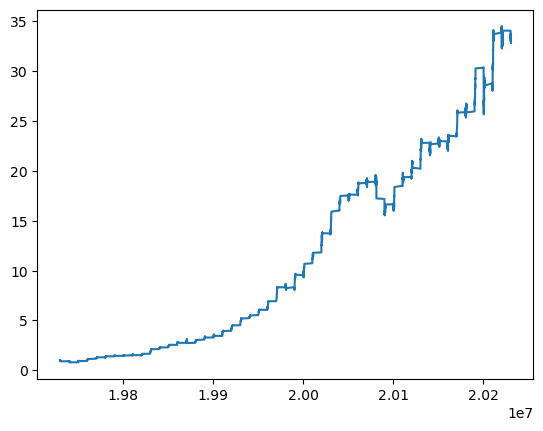

In [13]:
#We start the strategy in 01/1973 so that the first estimated weights are based on 01/1970 to 12/1972 data.
returns_w = data_returns_w.loc[19700101:]

#Computation of initial weights:

#Simulate an initial investment df 1 unit.
Initial_investment = 1
#The rolling window period will be 3 years (52*3 weeks).
t0 = 52*3 #track of investment week
#Select the data to compute the covariance matrix for the GMV portfolio.
covariance_data_calculation = returns_w.loc[returns_w.index[t0-52*3]:returns_w.index[t0-1]]
#Compute the weigths of the GWM portfolio
weights = GMV_portfolio(covariance_data_calculation.cov())

#Initiate the tracking structure starting with the first investment
dates =[returns_w.index[t0]]
Investment =[Initial_investment]

#Iteration of the strategy
while t0 + 11 < len(returns_w.index) : #To avoid errors we stop the iteration before the end of the dataset is reached.
    #For the next 12 weeks we use the same weights
    for i in range(12) :
        #Compute the portfolio returns for the current week
        Initial_investment = Initial_investment * np.dot(weights.T, (1+returns_w.loc[returns_w.index[t0]]))
        #Store the updated portfolio value
        Investment.append(Initial_investment)
        #Move to the next week
        t0+=1
        #Record the new date corresponding to the updated investment.
        dates.append(returns_w.index[t0])
    #rebalance after 12 weeks :
    #Select the data to compute the covariance matrix for the GMV portfolio and compute the rebalanced weights
    covariance_data_calculation = returns_w.loc[returns_w.index[t0-52*3]:returns_w.index[t0-1]]
    weights = GMV_portfolio(covariance_data_calculation.cov())

#result :
plt.plot(dates, Investment)

#### 2.9 Run a Global Minimum Variance portfolio strategy using the Factor based covariance matrix with quarterly rebalancing and rolling covariance estimation using a 3-year window.

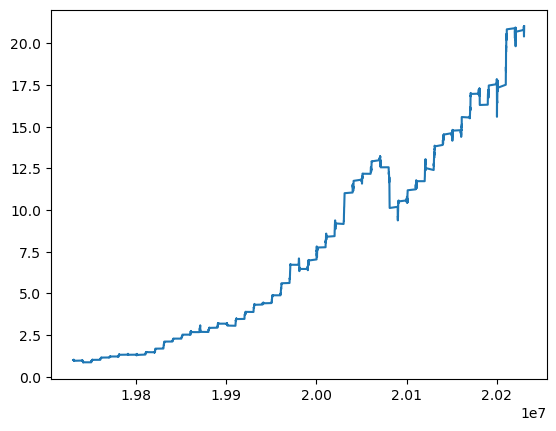

In [14]:
#Data implementation
#We start the strategy in 01/1973 so that the first estimated weights are based on 01/1970 to 12/1972 data.
returns_w = data_returns_w.loc[19700101:]
risk_free_returns_w = data_rf_returns_w.loc[19700101:]
factor_w = factor_data_3.loc[19700101:]

#Computation of initial weights :
#Simulate an initial investment df 1 unit.
Initial_investmentF = 1
#The rolling window period will be 3 years (52*3 weeks).
t0 = 52*3 #track of investment week
#Select the data to compute the Factor based covariance matrix for the GMV portfolio.
covariance_data_calculation_ret = risk_free_returns_w.loc[risk_free_returns_w.index[t0-52*3]:risk_free_returns_w.index[t0-1]]
covariance_data_calculation_fact = factor_w.loc[factor_w.index[t0-52*3]:factor_w.index[t0-1]]
#Compute the Factor Based Covariance Matrix
COV = Factor_based_covariance(covariance_data_calculation_ret, covariance_data_calculation_fact)
weights = GMV_portfolio(COV)

#Initiate the tracking structure starting with the first investment
datesF =[returns_w.index[t0]]
InvestmentF =[Initial_investmentF]

#Iteration of the strategy
while t0 + 11 < len(returns_w.index) : #To avoid errors we stop the iteration before the end of the dataset is reached.
    #For the next 12 weeks we use the same weights
    for i in range(12) :
        #Compute the portfolio returns for the current week
        Initial_investmentF = Initial_investmentF * np.dot(weights.T, (1+returns_w.loc[returns_w.index[t0]]))
        #Store the updated portfolio value
        InvestmentF.append(Initial_investmentF)
        #Move to next week
        t0+=1
        #Record the new date corresponding to the updated investment.
        datesF.append(returns_w.index[t0])
    #rebalance after 12 weeks :
    #Select the data to compute the covariance matrix for the GMV portfolio and computes the rabalanced weights
    covariance_data_calculation_ret = risk_free_returns_w.loc[risk_free_returns_w.index[t0-52*3]:risk_free_returns_w.index[t0-1]]
    covariance_data_calculation_fact = factor_w.loc[factor_w.index[t0-52*3]:factor_w.index[t0-1]]
    weights = GMV_portfolio(Factor_based_covariance(covariance_data_calculation_ret,covariance_data_calculation_fact))

#result :
plt.plot(datesF, InvestmentF)

#### 2.10 Compare the efficiency of the two strategies.

<function matplotlib.pyplot.show(close=None, block=None)>

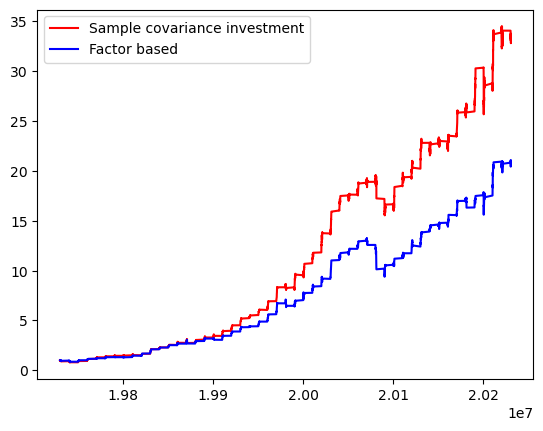

In [15]:
#Plot the evolution of both allocations.
plt.figure()
plt.plot(dates, Investment, c='r')
plt.plot(datesF, InvestmentF, c='b')
plt.legend(['Sample covariance investment', 'Factor based'])
plt.show()

The Factor based covariance portfolio has less returns than the sample covariance portfolio. However, as a Minimum Variance Portfolio, it's clearly most succeding

In [58]:
#Comparison of annual volatilities
Facor_based_volatility = pd.DataFrame(InvestmentF).pct_change().std() * np.sqrt(52)
Sample_covariance_volatility = pd.DataFrame(Investment).pct_change().std() * np.sqrt(52)
print(f"Facor_based_volatility is = {Facor_based_volatility[0]*100:.3f} %")
print(f"Sample_covariance_volatility is = {Sample_covariance_volatility[0]*100:.3f} %")

Facor_based_volatility is = 4.739 %
Sample_covariance_volatility is = 6.039 %


Factor based portfolio Volatility =  4.739 %
Sample covariance based portfolio Volatility =  6.039 %

We can see that the Factor based portfolio has a significantly lower volotility than the sample covariance based portfolio.

# Exercise 3
## Asian Option Pricing using Monte Carlo

#### 3.1 Simulate n paths of a stock price following a geometric Brownian motion using the Black-Scholes model, starting from an initial price $S_0$=100, with a daily steps(assuming 264 trading days per year), over a maturity of T=0.5 years, a constant risk-free rate r=2%, and a volatility $\sigma$=18%. Return a DataFrame containing the simulated paths and the maturity T.

In [51]:
def simul_path(n_path, S0, time_step, T, r, sigma) :
    """
    Simulate multiple paths of a stock price following a geometric Brownian motion (GBM),
    using the Black-Scholes model.

    Parameters:
    -----------
    n_path : int
        Number of simulated price paths.
    S0 : float
        Initial stock price.
    time_step : float
        Time increment between each simulation step (e.g., 1/264 for daily steps).
    T : float
        Time to maturity (in years).
    r : float
        Constant risk-free interest rate.
    sigma : float
        Volatility of the stock (standard deviation of returns).

    Returns:
    --------
    list
        A list containing:
        - A pandas DataFrame of shape (n_step+1, n_path), where each column is a simulated stock price path.
        - The total time horizon T (useful for reconstructing the time grid).
    """
    #Number of step in the simulation between t=0 to t=T
    n_step = int(T/time_step)
    #Generate a DataFrame to store the paths
    path = pd.DataFrame(np.ones((n_step+1, n_path))) #n_step +1 rows, because we start at t=0 and then make n_steps steps.
    #Initialize the first row with the initial stock price
    path.loc[0] = path.loc[0] * S0
    #For each time step we generate the evolution of the stock price for every path
    for i in range(1,n_step+1) :
        path.loc[i] = path.loc[i-1]*np.exp((r-0.5*sigma**2)*time_step + sigma*np.sqrt(time_step)*np.random.normal(0,1,size=n_path)) #formula for a log normal process
    return [path, T] #With T as an additional information so we can find the time step 

#Variables
#Initial stock price
Stock = 100
#Strike
K = 100
time_step = 1/264 #Daily working day
#Maturity
T = 0.5
#risk-free rate
r = 0.02
#volatility
sigma = 0.18
#Number of simulations
N_simulations = 10**4

#Simulate and store the simulations into a variable.
Simulation = simul_path(N_simulations, Stock, time_step, T, r, sigma)

<Axes: title={'center': 'Trajectory of Price'}>

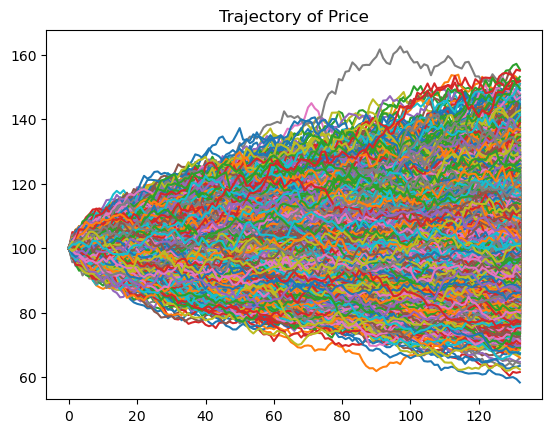

In [52]:
#Plot the result to check validity
Simulation[0].plot(legend=False,title='Trajectory of Price')

#### 3.2 Compute the Asian Option Price

Strategy: Compute the payoff of each simulated path to obtain the expected payoff, and then discount it to estimate the price of the Asian option.

In [53]:
"""
Our Payoff function and Price function don't depend on the maturity of the simulation :
We choose the maturity of the price/payoff we want and slice the simulation dataframe in accordingly.
"""

def Asian_Option_Payoff(Stock_simulation, K, T) : #Here T represent the Maturity we want the payoff to be on (it can be shorter than the simulation)
    """
    Compute the payoff of an Asian call option with arithmetic averaging.

    Parameters:
    -----------
    Stock_simulation : list
        - [0] is a DataFrame where each column represents a simulated price path over time.
        - [1] is the total time horizon of the simulation (float).
    K : float
        Strike price of the option.
    T : float
        Maturity of the option (in years). May be shorter than the full simulation horizon.

    Returns:
    --------
    pandas DataFrame
        A column vector containing the payoff of the option for each simulated path.
    """
    #Find the time step (Time to Maturity / number of steps)
    time_step = Stock_simulation[1]/(len(Stock_simulation[0])-1)
    #With the time step and the maturity we want, we find the number of step to progress in the simulation
    n_step = int(T/time_step)
    #Create a DataFrame to store the results
    Result = pd.DataFrame(np.zeros(len(Stock_simulation[0].columns)))
    
    #Compute the payoff for each paths.
    for i in range(len(Result)) :
        #Arithmetic asian option formula
        Result.iloc[i] = max(0, Stock_simulation[0].iloc[:n_step+1,i].mean()-K) #Each row of result countain the payoff at T(=n_steps+1) from column i of the simulation
    return Result

def Asian_Option_Price(Stock_simulation,K,r,T) :
    """
    Compute the estimated price of an Asian call option using Monte Carlo simulation.

    Parameters:
    -----------
    Stock_simulation : list
        Output from the simul_path function: [paths DataFrame, maturity T_sim].
    K : float
        Strike price of the option.
    r : float
        Constant risk-free interest rate.
    T : float
        Maturity of the option (in years) — must match the payoff horizon.

    Returns:
    --------
    float
        Estimated price of the Asian option (present value of expected payoff).
    """
    #Compute the Payoff for each simulation
    Payoff = Asian_Option_Payoff(Stock_simulation, K, T)
    #Compute the expected Payoff
    Expected_Payoff = Payoff.mean()
    #Discount the expected payoff using the risk-free rate.
    return np.exp(-r*T) * Expected_Payoff #The price is the present value of the expected payoff.

Price = Asian_Option_Price(Simulation, Stock, r, T)
print(Price)

0    3.213074
dtype: float64


#### Sanity check. We make sure that the option price and payoff increases with the maturity

In [54]:
T= np.arange(1/264, 30/264, 1/264)
testing = []
testingpayoff = []
for t in T :
    testing.append(Asian_Option_Price(Simulation,K,r,t))
    testingpayoff.append(Asian_Option_Payoff(Simulation,K,t))

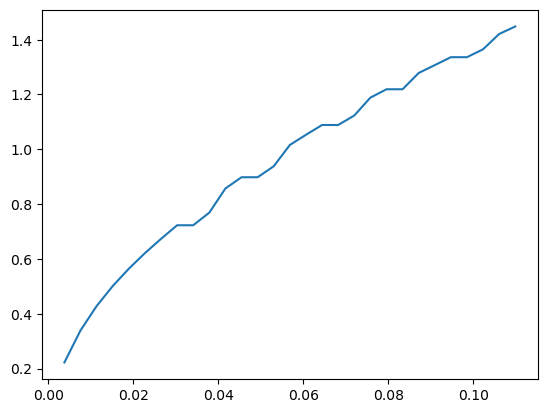

In [55]:
meantestintpayoff = []
for i in range(len(testingpayoff)) :
    meantestintpayoff.append(testingpayoff[i].mean())
plt.plot(T,meantestintpayoff)

We find a price of $3.14. However it is from 1 simulation, it will vary between 3.05 to 3.25 on average.

#### 2.3 Compute the price of a weekly Monitored Asian call option price

In [32]:
"""
The function is almost the same, the only change is the selections of the lines of the simulation
"""

def Asian_Option_Payoff_Monitored(Stock_simulation, K, T, Monitoring_factor) :
    """
    Compute the payoff of an Asian call option with discrete monitoring.

    Parameters:
    -----------
    Stock_simulation : list
        - [0] is a DataFrame: each column is a simulated stock price path.
        - [1] is the total time horizon of the simulation.
    K : float
        Strike price of the option.
    T : float
        Maturity of the option (in years).
    Monitoring_factor : int
        Determines how frequently the average is computed. 
        For example, if 5, only every 5th time step is used in the averaging.

    Returns:
    --------
    pandas DataFrame
        A column vector containing the payoff of the option for each simulated path.
    """
    #Find the time step (Time to Maturity / number of steps)
    time_step = Stock_simulation[1]/(len(Stock_simulation[0])-1)
    #With the time step and the maturity we want, we find the number of step to progress in the simulation
    n_step = int(T/time_step)
    #Create a DataFrame to store the results
    Result = pd.DataFrame(np.zeros(len(Stock_simulation[0].columns)))
    #Compute the payoff for each paths.
    for i in range(len(Result)) :
        """
        l % Monitoring_factor ==0 for l in Stock_simulation[0].index : we only apply the mean function to every 'l' dates of the simulation
        """
        Result.iloc[i] = max(0, Stock_simulation[0].loc[[l % Monitoring_factor ==0 for l in Stock_simulation[0].index]].iloc[:n_step+1,i].mean()-K)
    return Result

def Asian_Option_Price_Monitored(Prices,K ,r ,T ,Monitoring_factor) : #Same function as first exercise, we only change the number of input
    """
    Estimate the price of an Asian call option with discrete monitoring.

    Parameters:
    -----------
    Prices : list
        Simulated paths from simul_path (same format as Stock_simulation).
    K : float
        Strike price of the option.
    r : float
        Risk-free rate.
    T : float
        Maturity (in years).
    Monitoring_factor : int
        Frequency of monitoring (e.g., 5 = every 5th time step).

    Returns:
    --------
    float
        Estimated price of the Asian option.
    """
    #Compute the Payoff for each simulation
    Payoff = Asian_Option_Payoff_Monitored(Prices, K, T, Monitoring_factor)
    #Compute the expected Payoff
    Expected_Payoff = Payoff.mean()
    #Discount the expected payoff using the risk-free rate
    return np.exp(-r*T) * Expected_Payoff

Monitoring_factor = 5
Price_Monitored = Asian_Option_Price_Monitored(Simulation, K, r, T, Monitoring_factor)
print(Price_Monitored)

0    3.152852
dtype: float64


We find a price of $3.105 < 3.14: The price decreses when we diminish the number of monitoring periods

#### 2.4 Compute the evolution of the Asian call option price according to the maturity. Is the Asian call option Theta Positive, Negative or Null ? 

In [33]:
def varying_maturity(Stock_simulation, T_0, T_max, T_step, r, K) :
    """
    Simulate the price of an Asian option for various maturities,
    and compute confidence intervals for the Monte Carlo estimation.

    Parameters:
    -----------
    Stock_simulation : list
        Output of simul_path function: [DataFrame of simulated paths, total horizon].
    T_0 : float
        Initial maturity to test (e.g., 0.1 years).
    T_max : float
        Maximum maturity to test.
    T_step : float
        Step increment between successive maturities.
    r : float
        Constant risk-free rate.
    K : float
        Strike price of the Asian option.

    Returns:
    --------
    list
        A list containing:
        - Prices: estimated option prices at each maturity.
        - Maturity: corresponding maturities tested.
        - CI_plus: upper bound of 95% confidence interval.
        - CI_minus: lower bound of 95% confidence interval.
    """
    #Obtain the number of simulated paths
    n_path = len(Stock_simulation[0].columns)
    #Set the tracking list for the confidence intervals, Prices and Maturities.
    CI_plus = []
    CI_minus = []
    Prices = []
    Maturity = []
    # Loop over different maturities
    for n in range(int((T_max-T_0)/T_step)):
        #Compute new Maturity
        New_T = T_0+n*T_step #The only parameter to vary is the maturity : the way we built our payoff function we only have to change this parameter
        # Estimate the price of the Asian option for this maturity
        Prices.append(Asian_Option_Price(Stock_simulation, K, r, New_T))
        # Retrieve the full vector of simulated payoffs
        Payoff = Asian_Option_Payoff(Stock_simulation, K, New_T)
        # Store the current maturity
        Maturity.append(New_T)

        # Compute the 95% confidence interval for the estimated price using CLT
        # CI = E[Payoff] ± 1.96 * (std / sqrt(n))
        CI_plus.append(np.exp(-r*(New_T)) * (Payoff.mean()+1.96/np.sqrt(n_path) * Payoff.std()))
        CI_minus.append(np.exp(-r*(New_T)) * (Payoff.mean()-1.96/np.sqrt(n_path) * Payoff.std()))
        
    return [Prices, Maturity, CI_plus, CI_minus]

Set parameters values and compute the evolution of the asian option call price according to the maturities

In [34]:
T_0 = 1/264 #Day 1
T_max = T #Initial maturity
varying1 = varying_maturity(Simulation, T_0, T_max, time_step, r, K)

Plot the result and the confidence intervals

Text(0.5, 1.0, 'Asian Option prices price depending on Maturity')

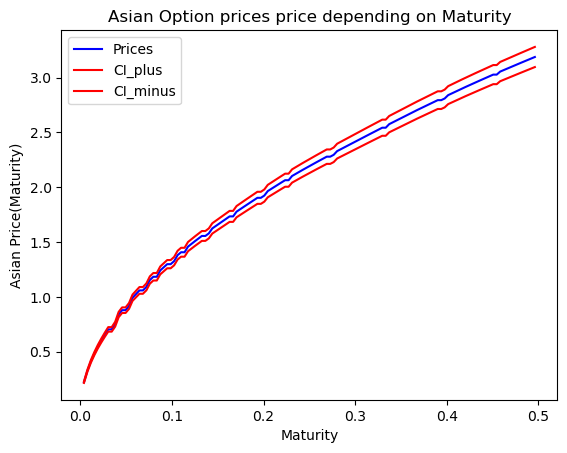

In [35]:
plt.figure()
plt.plot(varying1[1], varying1[0], c = 'b')
plt.plot(varying1[1], varying1[2], c = 'r')
plt.plot(varying1[1], varying1[3], c = 'r')
plt.legend(['Prices', 'CI_plus', 'CI_minus'])
plt.ylabel('Asian Price(Maturity)')
plt.xlabel('Maturity')
plt.title('Asian Option prices price depending on Maturity')

The option Theta is clearly negative.